# Working with data from a survey

We are going to use a library called `pandas`, which is created and given away for free by a big group of people led by Wes McKinney. Wes did a lot of the work on the library while working at AQR Capital, a hedge fund investment firm, and convinced them to let him give away the code.

There is also a library called `openpyxl` that `pandas` uses to read Excel files, written and given away for free by software development consultants Eric Gazoni and Charlie Clark.

In [1]:
!pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable


### Import library

For short, we abbreviate `pandas` as `pd`:

In [2]:
import pandas as pd

### Reading data

Pandas lets us read data files, which can be in a lot of different file formats. Once we upload the file to this folder, we can have the computer read it, and store a copy in our notebook's memory as `datafile`.

This datafile is a variable, just like `my_name` from last week. But it contains a lot of data. We can see a preview if we put the variable name as the last line in a code cell:

__For lab: replace the filename in quotes below with the one you uploaded__

In [3]:
datafile = pd.read_csv("COMM106E_test_survey.csv")
datafile

,Age,Ethnicity1,Ethnicity2,Education
0,What is your age?,"Are you of Hispanic, Latino, or Spanish origin?",How would you describe yourself? Please select...,What is the highest degree or level of school ...
1,"{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}"
2,18 - 24,No,White,"Doctorate or professional degree (e.g. MD, DDS..."
3,Under 18,No,White,"Doctorate or professional degree (e.g. MD, DDS..."
4,35 - 44,Yes,White,"Some college, no degree"
5,18 - 24,Yes,Other,"Bachelor's degree (e.g. BA, BS)"
6,18 - 24,Yes,Other,High school degree or equivalent (e.g. GED)
7,18 - 24,No,White,High school degree or equivalent (e.g. GED)
8,25 - 34,No,White,High school degree or equivalent (e.g. GED)
9,25 - 34,No,Black or African American,High school degree or equivalent (e.g. GED)


### Selecting rows (or __slicing__)

Normally in a data file, the first row is the __header__, containing the name of each column. Qualtrics gives us three different headers:

0. The short version of the question name (e.g. "Age)
1. The question text displayed to users (e.g. "What is your age?")
2. A Qualtrics-specific question id, in its own format (e.g. {"ImportId":"QID2"})

We only need one header, and the one in row 0 is the best for our purposes. So we want to select all the rows __after__ the first two rows. This is called a __slice__, like a slice of pizza or cake.

In any pandas dataframe, you can use square brackets to select a range of rows. If you want rows 4 to 6, you actually do:

In [4]:
datafile[4:7]

,Age,Ethnicity1,Ethnicity2,Education
4,35 - 44,Yes,White,"Some college, no degree"
5,18 - 24,Yes,Other,"Bachelor's degree (e.g. BA, BS)"
6,18 - 24,Yes,Other,High school degree or equivalent (e.g. GED)


This is a bit confusing, which is why I like Jupyter notebooks. You can see what a slice looks like, and re-do it if you want.

You can leave the number after the `:` blank in order to slice to the end. If we only want to select the rows starting at row 2 and going to the end, we use:

In [5]:
datafile[2:]

,Age,Ethnicity1,Ethnicity2,Education
2,18 - 24,No,White,"Doctorate or professional degree (e.g. MD, DDS..."
3,Under 18,No,White,"Doctorate or professional degree (e.g. MD, DDS..."
4,35 - 44,Yes,White,"Some college, no degree"
5,18 - 24,Yes,Other,"Bachelor's degree (e.g. BA, BS)"
6,18 - 24,Yes,Other,High school degree or equivalent (e.g. GED)
7,18 - 24,No,White,High school degree or equivalent (e.g. GED)
8,25 - 34,No,White,High school degree or equivalent (e.g. GED)
9,25 - 34,No,Black or African American,High school degree or equivalent (e.g. GED)


Now we are going to save a new variable, called `datafile_slice` with our slice. We don't really need to save a new variable, as we could have saved over the original datafile variable. But it is usually good practice to keep the original and the new slice, just in case you mess it up.

In [6]:
datafile_slice = datafile[2:]

Now if we look at `datafile_slice`, we see:

In [7]:
datafile_slice

,Age,Ethnicity1,Ethnicity2,Education
2,18 - 24,No,White,"Doctorate or professional degree (e.g. MD, DDS..."
3,Under 18,No,White,"Doctorate or professional degree (e.g. MD, DDS..."
4,35 - 44,Yes,White,"Some college, no degree"
5,18 - 24,Yes,Other,"Bachelor's degree (e.g. BA, BS)"
6,18 - 24,Yes,Other,High school degree or equivalent (e.g. GED)
7,18 - 24,No,White,High school degree or equivalent (e.g. GED)
8,25 - 34,No,White,High school degree or equivalent (e.g. GED)
9,25 - 34,No,Black or African American,High school degree or equivalent (e.g. GED)


## How many responses for each item?

One of the most common tasks for surveys is to count the number of responses for each. We first start by accessing the column we care about. If you have trouble remembering which direction is a row versus column, remember that buildings have columns that go up and down.

The cell below displays just the responses for Age. Note that you have to use the same capitalization and spacing, or else it won't find it. 

When we display a column, it does not give us the same nicely-formatted table as an entire dataframe. The first number in each line is the original row number (remember we removed rows 0 and 1?). The second is the response.

In [8]:
datafile_slice["Age"]

2     18 - 24
3    Under 18
4     35 - 44
5     18 - 24
6     18 - 24
7     18 - 24
8     25 - 34
9     25 - 34
Name: Age, dtype: object

Now we are going to use a variable called `column_to_count`, where we save the name of the column we care about. This way, it makes it easy to change one variable if we want to analyze a different column:

__For lab: replace "Age" with the name of the column you want to analyze__

In [9]:
column_to_count = "Age"

In [10]:
datafile_slice[column_to_count]

2     18 - 24
3    Under 18
4     35 - 44
5     18 - 24
6     18 - 24
7     18 - 24
8     25 - 34
9     25 - 34
Name: Age, dtype: object

### Value counts

But we want to count up all of those responses. We add `.value_counts()` to the end, like this:

In [11]:
datafile_slice[column_to_count].value_counts()

18 - 24     4
25 - 34     2
Under 18    1
35 - 44     1
Name: Age, dtype: int64

Sometimes we want just the total counts, but other times we might want to know the proportion (that is, out of 100%). We can add a __parameter__ called `normalize` to `.value_counts` like this:

In [12]:
datafile_slice[column_to_count].value_counts(normalize=True)

18 - 24     0.500
25 - 34     0.250
Under 18    0.125
35 - 44     0.125
Name: Age, dtype: float64

This is another thing to get used to in data science land: percentages are displayed as a decimal, so 100% is 1.0, 50% is 0.5, and so on.

### Plotting graphs of value counts

Just like we added `.value_counts()`, we can add another function to plot a graph. By default, it tries to display a line graph. 

<AxesSubplot:>

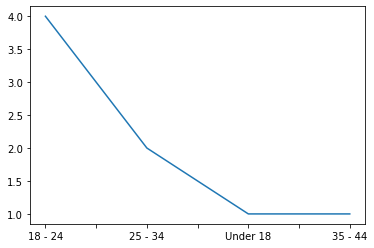

In [13]:
datafile_slice[column_to_count].value_counts().plot()

But I think a bar graph is better for this kind of question. We can add another parameter to the `plot` function to specify the `kind` of plot:

<AxesSubplot:>

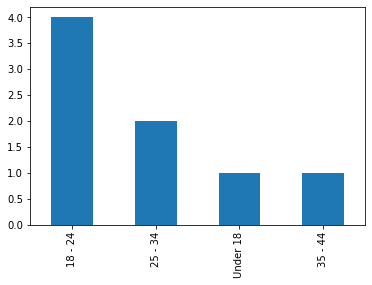

In [14]:
datafile_slice[column_to_count].value_counts().plot(kind='bar')

There are lots of different `kind`s of graph styles. I use `barh` or horizontal bar graphs a lot:

<AxesSubplot:>

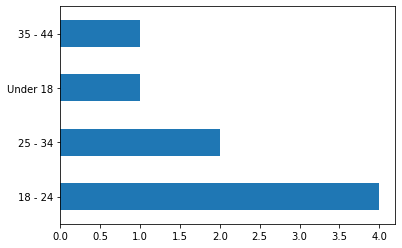

In [15]:
datafile_slice[column_to_count].value_counts().plot(kind='barh')

There are a lot of __parameters__ for `.plot()`. For example: 

__For lab: make sure to rename the title and labels__

<AxesSubplot:title={'center':'Respondents by age'}, xlabel='Age range', ylabel='Count'>

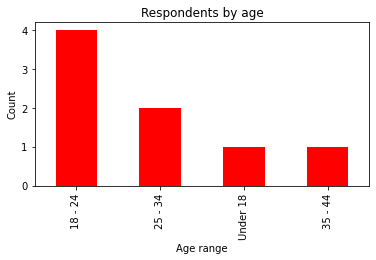

In [16]:
datafile_slice[column_to_count].value_counts().plot(kind='bar', 
                                          title="Respondents by age",
                                          ylabel="Count",
                                          xlabel="Age range",
                                          color="red",
                                          figsize=(6,3))

#### Rearraging rows

One problem is that this might not be in the order you want. To work with this, we take advantage of the fact that everything can be stored as a variable, including the output of `value_counts`. So we first save the results of `value_counts` to a new variable:

In [17]:
column_counts = datafile_slice[column_to_count].value_counts()
column_counts

18 - 24     4
25 - 34     2
Under 18    1
35 - 44     1
Name: Age, dtype: int64

We then manually specify a __list__ in the order we want:

__For lab: make sure to set the order you want for your column__

In [18]:
sort_order = ["Under 18", "18 - 24", "25 - 34", "35 - 44"]

And then instead of using `datafile_slice[column_to_count].value_counts()` in the code above, we can use this in the same place:

In [19]:
column_counts[sort_order]

Under 18    1
18 - 24     4
25 - 34     2
35 - 44     1
Name: Age, dtype: int64

__For lab: make sure to rename the title and labels__

<AxesSubplot:title={'center':"Respondents' by age"}, xlabel='Age range', ylabel='Count'>

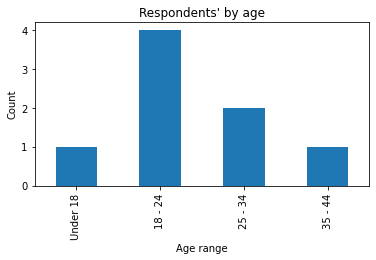

In [20]:
column_counts[sort_order].plot(kind='bar', 
                               title="Respondents' by age",
                               ylabel="Count",
                               xlabel="Age range",
                               figsize=(6,3))

## Remember to go to `Kernel -> Restart and Run all` to make sure it works all the way through.